#Importando as bibliotecas


In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Resumo dos dados**

**Contexto:**
Este conjunto de dados remonta a 1988 e consiste em quatro bancos de dados: Cleveland, Hungria, Suíça e Long Beach V. Ele contém 76 atributos, incluindo o atributo previsto, mas todos os experimentos publicados se referem ao uso de um subconjunto de 14 deles. O campo "alvo" refere-se à presença de doença cardíaca no paciente. Ele é avaliado como inteiro, onde 0 = sem doença e 1 = doença.

**Conteúdo - Informações dos atributos:**
1. Idade (age)
2. Sexo (sex)
3. Tipo de dor no peito (4 valores) (chest pain type)
4. Pressão arterial em repouso (resting blood pressure)
5. Colesterol sérico em mg/dl (serum cholestoral)
6. Açúcar no sangue em jejum > 120 mg/dl (fasting blood sugar)
7. Resultados eletrocardiográficos em repouso (valores 0,1,2) (resting electrocardiographic results)
8. Frequência cardíaca máxima atingida (maximum heart rate achieved)
9. Angina induzida pelo exercício (exercise induced angina)
10. Desvio ST induzido pelo exercício em relação ao repouso (oldpeak)
11. A inclinação do segmento ST do exercício de pico (the slope of the peak exercise ST segment)
12. Número de vasos principais (0-3) coloridos por fluoroscopia (number of major vessels)
13. Thal: 0 = normal; 1 = defeito fixo; 2 = defeito reversível (thal)

Os nomes e números de seguro social dos pacientes foram recentemente removidos do banco de dados e substituídos por valores fictícios.


In [274]:
data = pd.read_csv(f"heart.csv")

In [275]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [276]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [277]:
data.duplicated().sum()

723

In [278]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [279]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [280]:
data0 = data.drop_duplicates()

<Axes: >

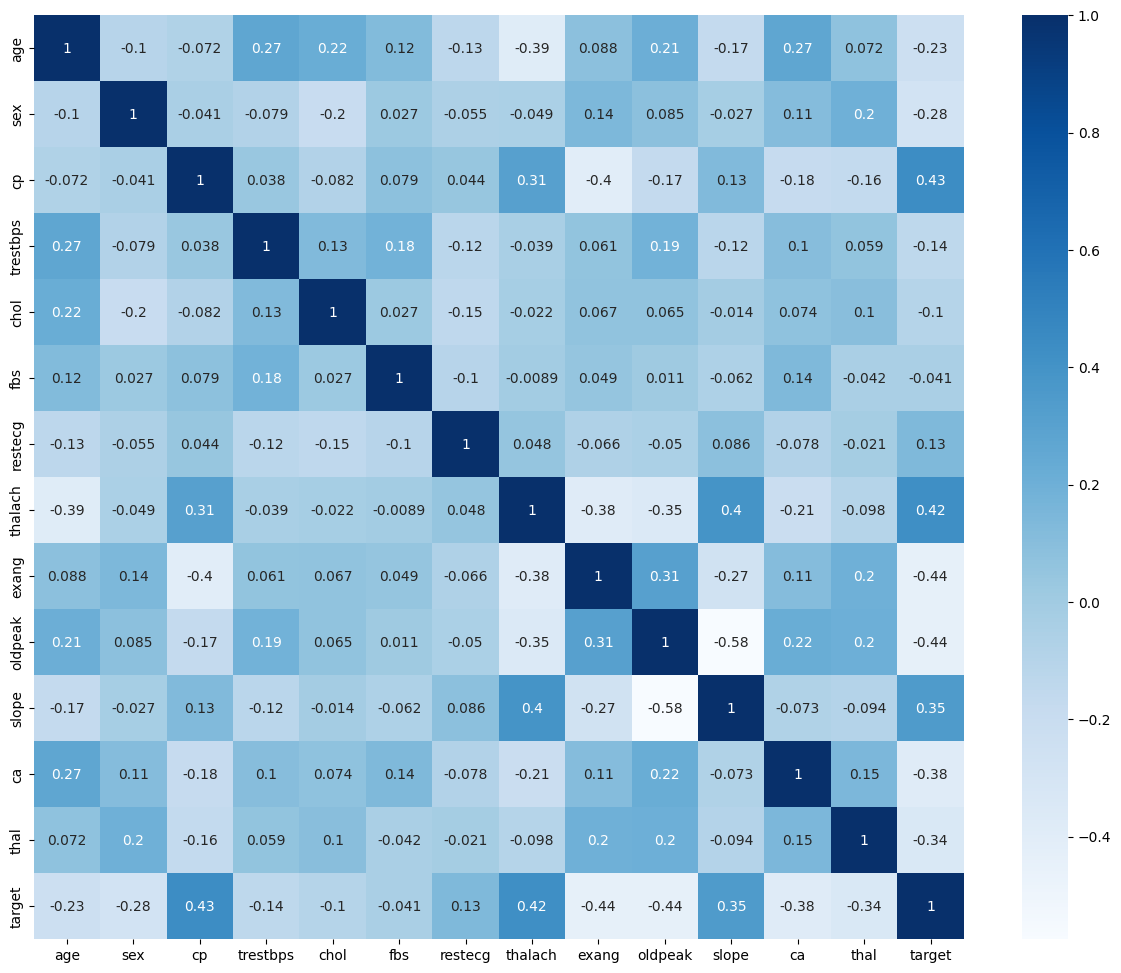

In [281]:
plt.figure(figsize= (15,12))
sns.heatmap(data.corr(), annot = True, cmap= 'Blues')

In [282]:
data0.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [283]:
for x in data.columns:
    print(f"{x}: {data0[x].nunique()}")

age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2


In [284]:
categoricos = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

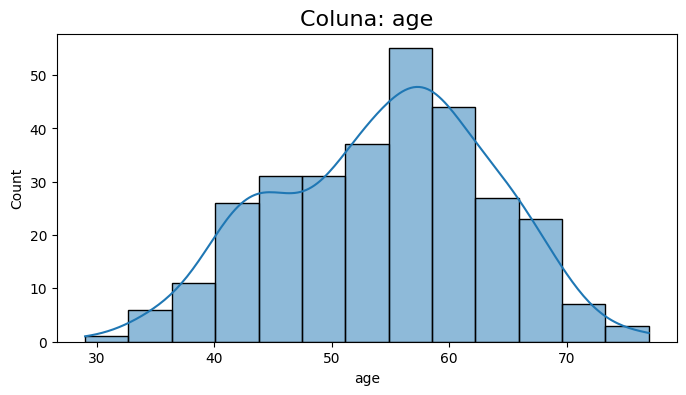

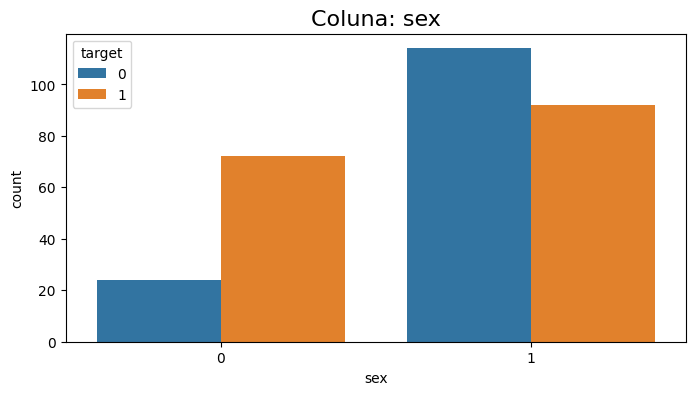

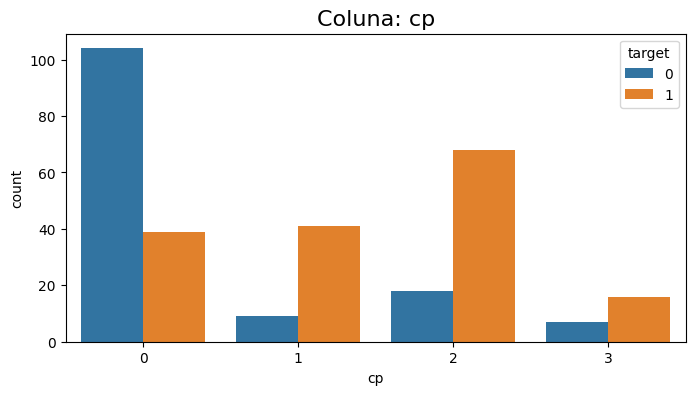

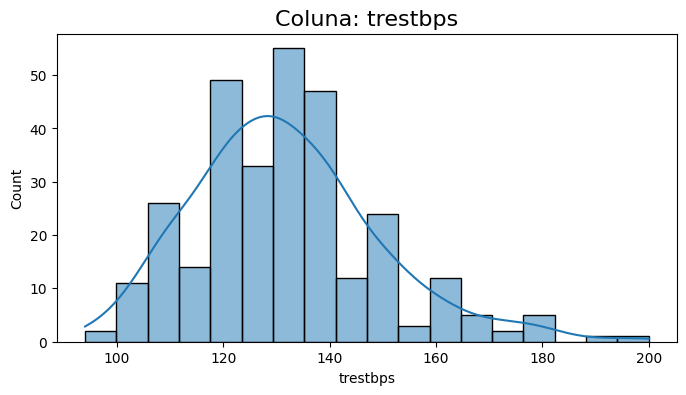

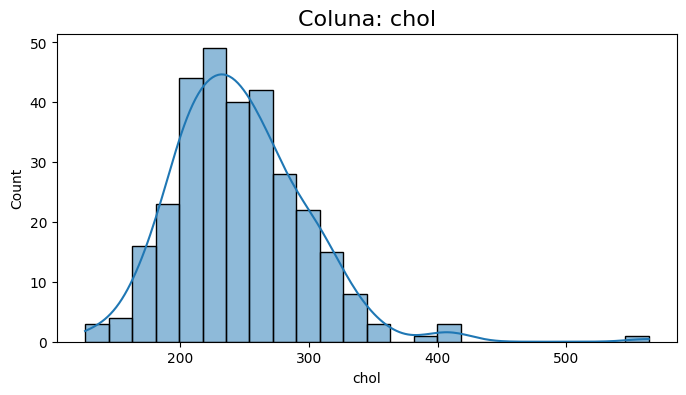

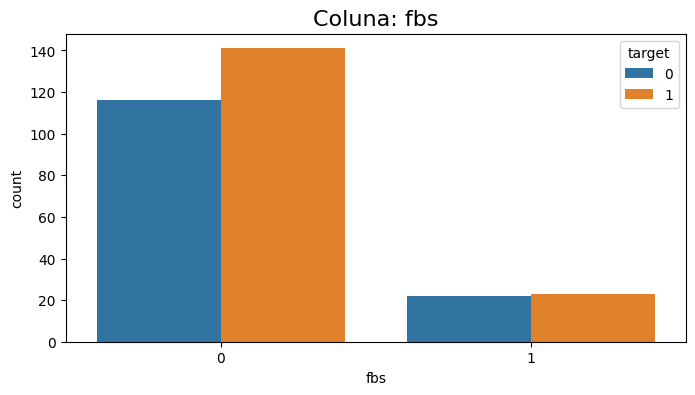

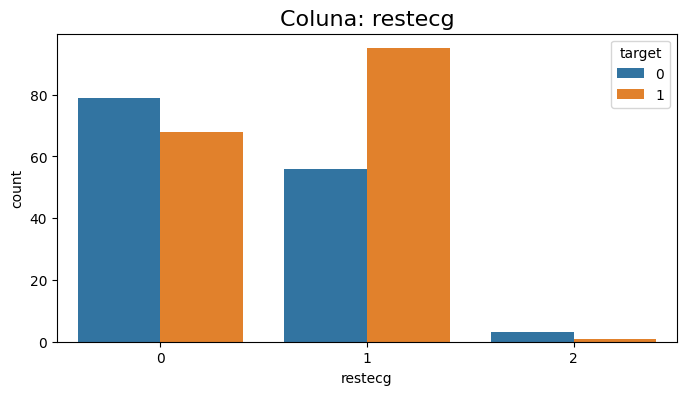

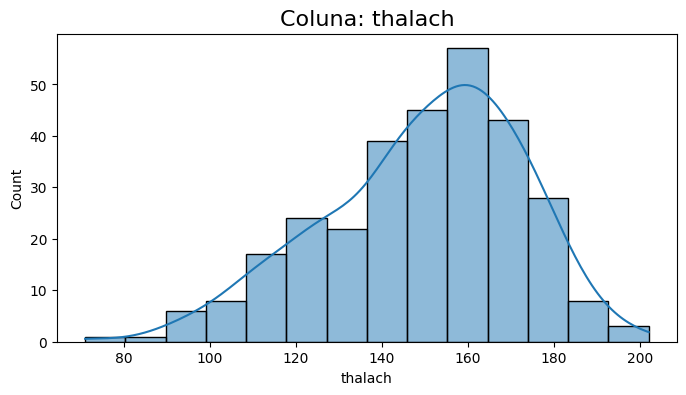

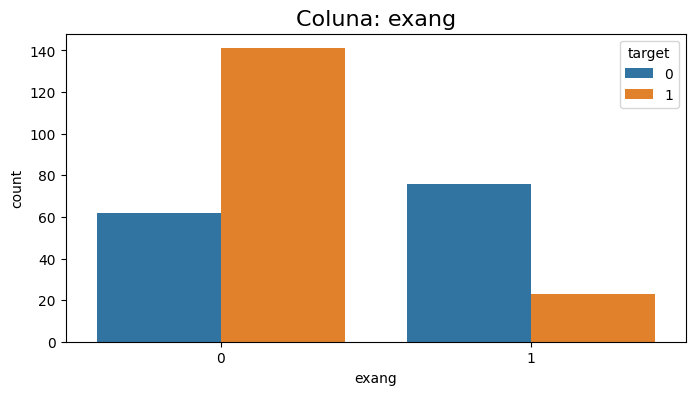

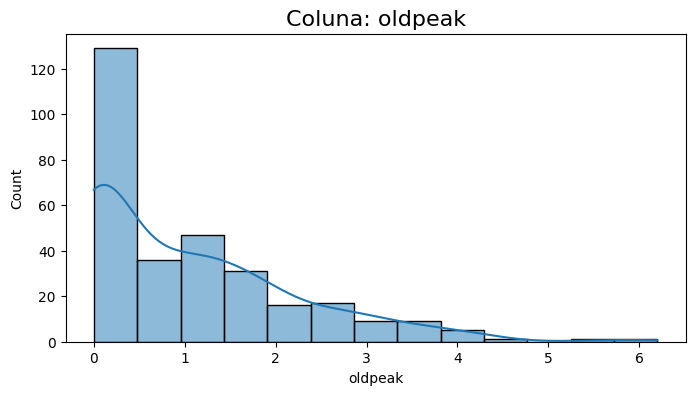

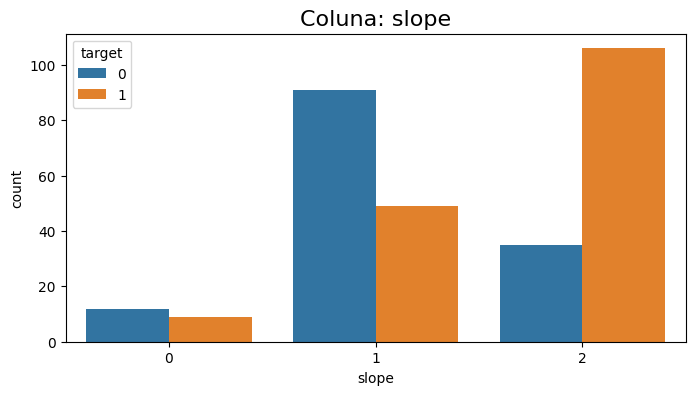

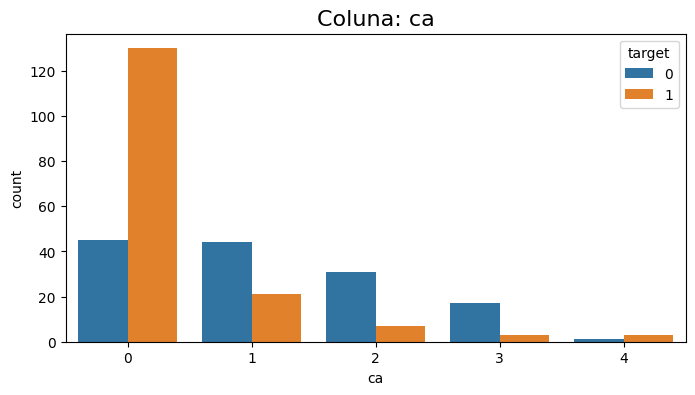

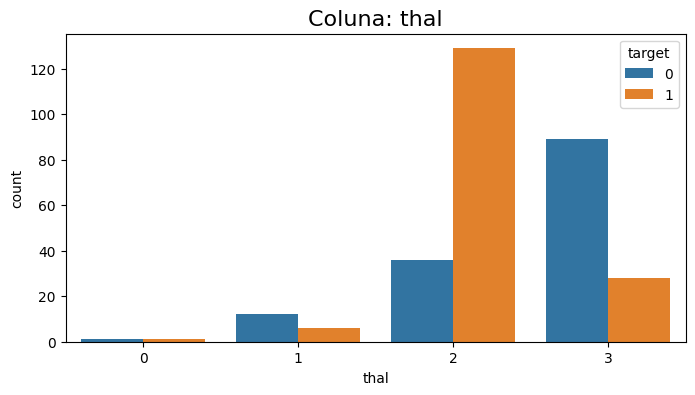

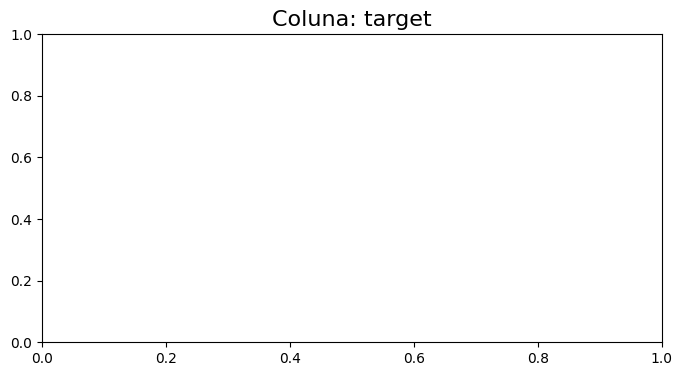

In [322]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)




for i in data0.columns:
    plt.figure(figsize=(8,4))
    plt.title(f"Coluna: {i}", fontsize = 16)

    if i in categoricos:
        sns.countplot(x = data0[i], hue = data0['target'])
    if i in numericas:
        sns.histplot(data0[i], kde=True)

In [286]:
data0.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

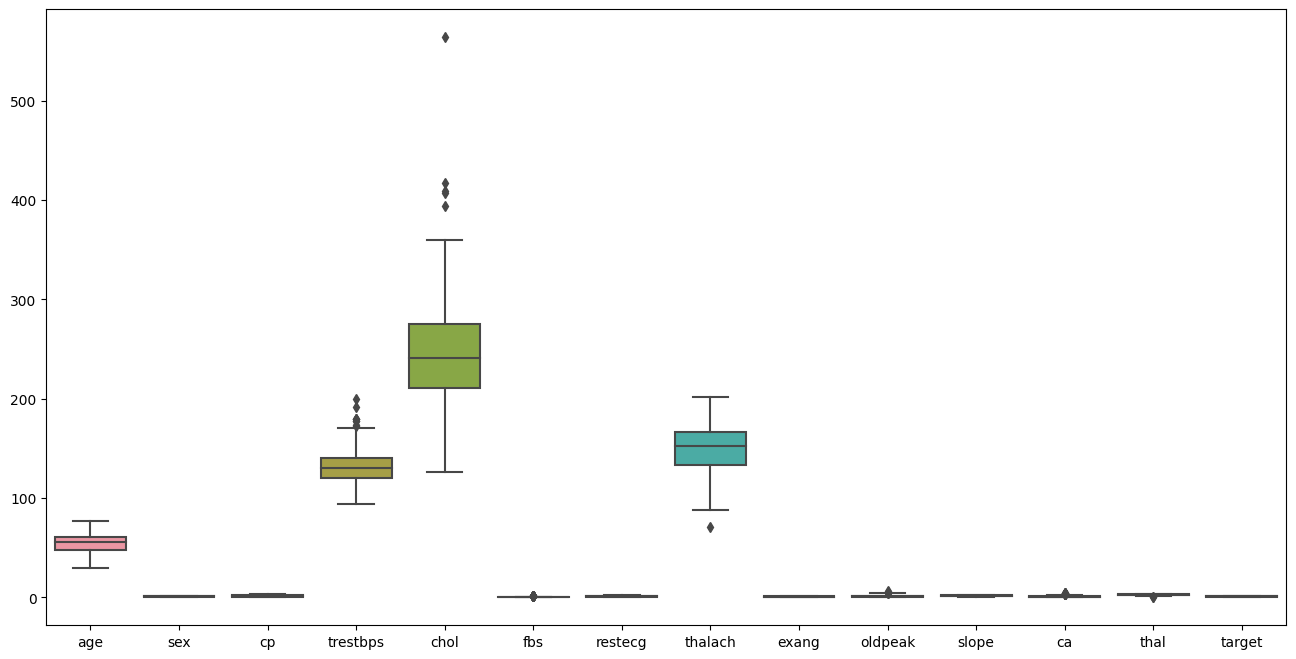

In [323]:
warnings.filterwarnings("ignore", category=FutureWarning)




plt.figure(figsize=(16,8))
sns.boxplot(data=data0)

In [288]:
data0.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [289]:
data0['trestbps'].quantile(0.99)

180.0

In [290]:
data1 = data0[data0['trestbps'] < data0['trestbps'].quantile(0.99)]

In [291]:
data1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.336700,0.686869,0.969697,130.680135,245.609428,0.144781,0.525253,149.565657,0.319865,1.030303,1.400673,0.720539,2.309764,0.548822
std,9.071847,0.464550,1.034420,16.154304,51.645776,0.352474,0.520072,22.844729,0.467211,1.146686,0.613254,1.009758,0.613755,0.498451
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<Axes: >

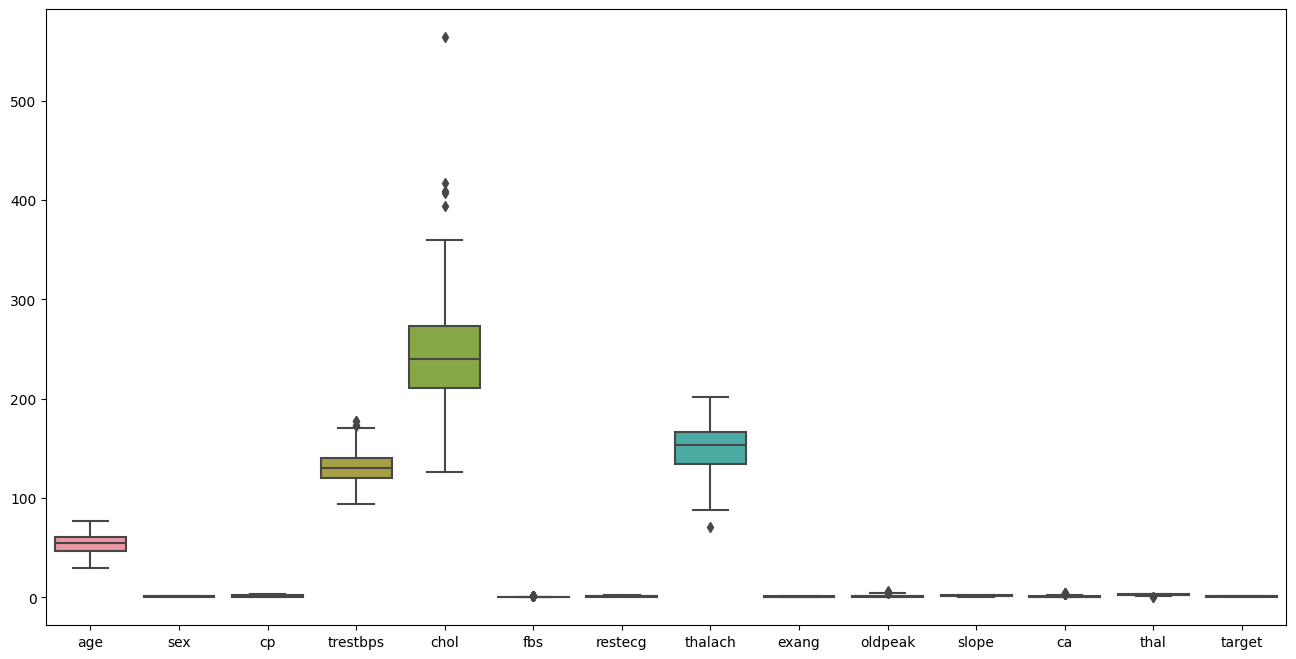

In [324]:
warnings.filterwarnings("ignore", category=FutureWarning)



plt.figure(figsize=(16,8))
sns.boxplot(data=data1)

In [293]:
data1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.336700,0.686869,0.969697,130.680135,245.609428,0.144781,0.525253,149.565657,0.319865,1.030303,1.400673,0.720539,2.309764,0.548822
std,9.071847,0.464550,1.034420,16.154304,51.645776,0.352474,0.520072,22.844729,0.467211,1.146686,0.613254,1.009758,0.613755,0.498451
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,273.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [294]:
data1['chol'].quantile(0.98)

354.4799999999999

In [295]:
data2 = data1[data1['chol'] < data1['chol'].quantile(0.98)]

<Axes: >

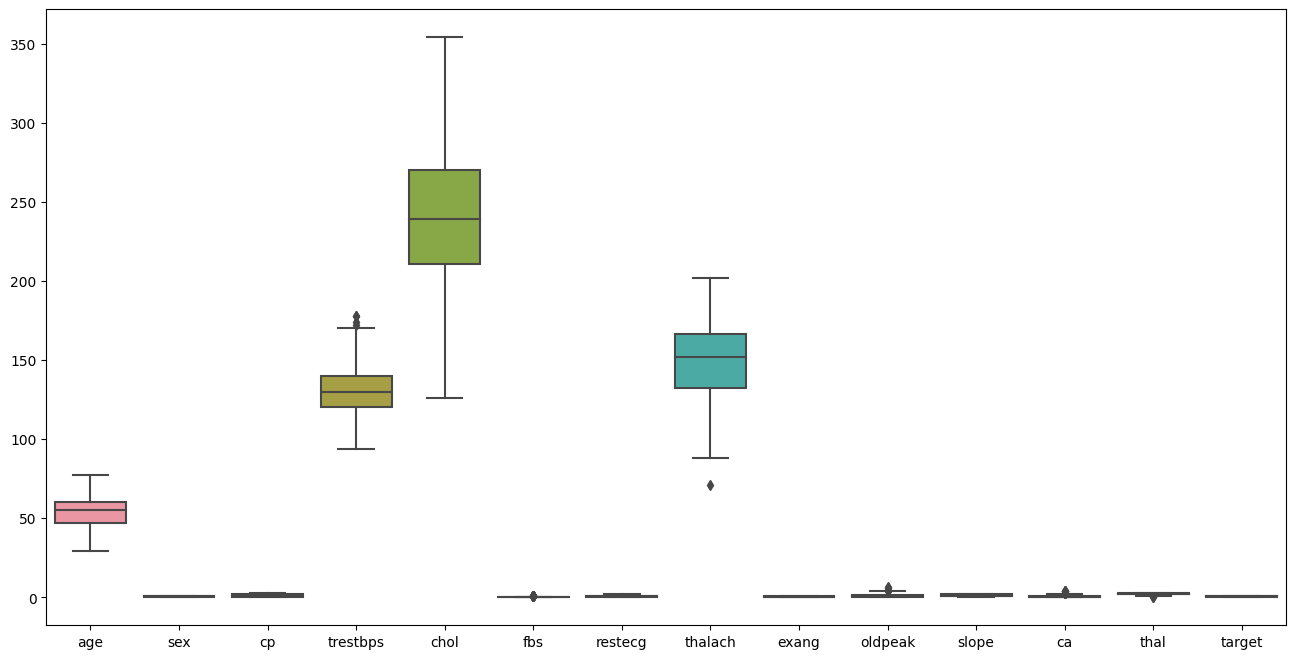

In [325]:
warnings.filterwarnings("ignore", category=FutureWarning)



plt.figure(figsize=(16,8))
sns.boxplot(data=data2)

In [297]:
data2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,54.158076,0.701031,0.969072,130.491409,241.907216,0.144330,0.536082,149.457045,0.323024,1.016151,1.402062,0.714777,2.305842,0.546392
std,9.064278,0.458595,1.035111,16.142761,44.214699,0.352029,0.519851,23.061553,0.468437,1.143368,0.615766,1.005719,0.615266,0.498701
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.500000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,152.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,166.500000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,178.000000,354.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [298]:
data2['thalach'].quantile(0.005)

88.9

In [299]:
data3 = data2[data2['thalach'] > data2['thalach'].quantile(0.005)]

<Axes: >

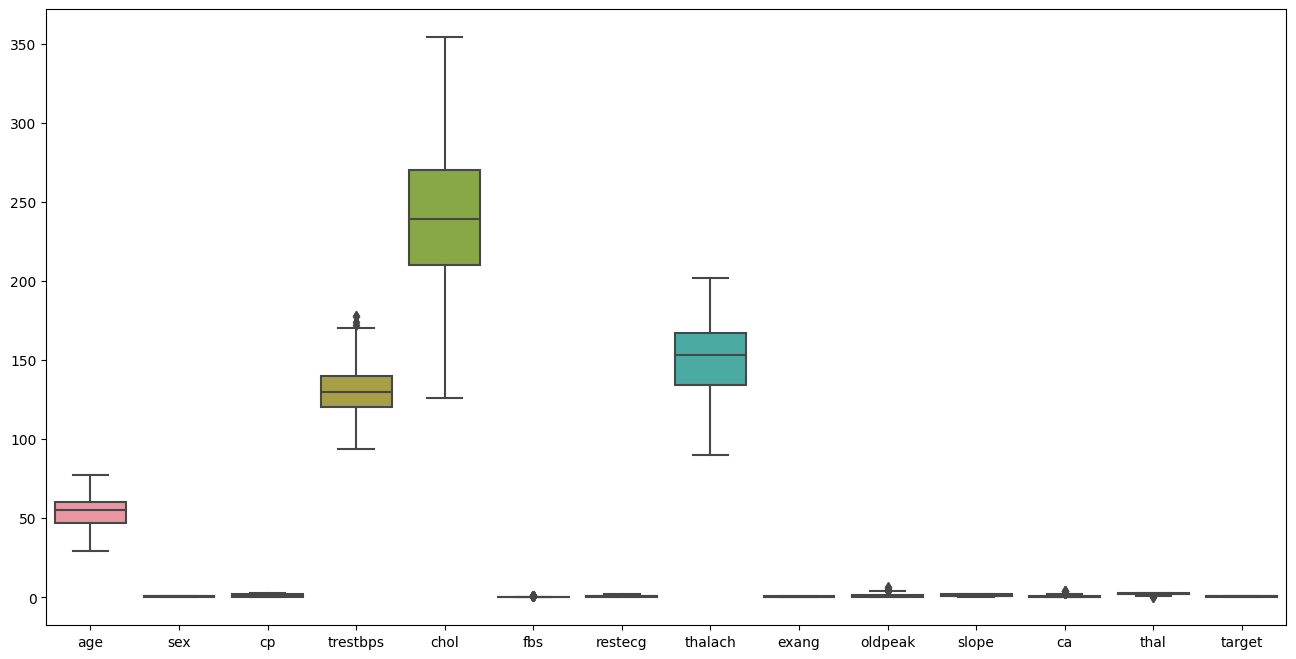

In [326]:
warnings.filterwarnings("ignore", category=FutureWarning)




plt.figure(figsize=(16,8))
sns.boxplot(data=data3)

In [301]:
categoricos = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numericas = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [302]:
data4 = pd.get_dummies(data3, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
data4

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,53,140,203,155,3.1,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,70,145,174,125,2.6,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,61,148,203,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,62,138,294,106,1.9,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,120,211,115,1.5,1,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
733,44,108,141,175,0.6,1,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
739,52,128,255,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
843,59,160,273,125,0.0,0,False,True,False,False,...,True,True,False,False,False,False,False,False,True,False


###Importação das bibliotecas para machine learning

***train_test_split***

A função ***train_test_split*** é usada para dividir um conjunto de dados em subconjuntos de treinamento e teste. Isso é fundamental para treinar modelos de aprendizado de máquina, onde você usa os dados de treinamento para treinar o modelo e os dados de teste para avaliar o desempenho do modelo.

***Métricas de Avaliação do Modelo:***

Esses imports são para métricas que ajudam a avaliar o desempenho dos modelos de aprendizado de máquina:

***accuracy_score***

O ***accuracy_score*** é uma métrica que mede a precisão de um modelo, ou seja, a proporção de previsões corretas em relação ao total de previsões. É útil para classificação binária e multiclasse.

***classification_report***

O ***classification_report*** fornece uma análise mais detalhada da precisão, recall, pontuação F1 e outras métricas de classificação para cada classe em um problema de classificação. É útil para entender o desempenho do modelo em diferentes classes.

***confusion_matrix***

A ***confusion_matrix*** é uma matriz que mostra o número de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos. É uma ferramenta importante para entender os erros de classificação de um modelo.

***Pré-processamento de Dados:***

Esses imports são para técnicas de pré-processamento de dados:

***StandardScaler***

O ***StandardScaler*** é usado para padronizar (normalizar) os recursos em um conjunto de dados. Isso é útil quando as características têm escalas diferentes e você deseja que todas tenham a mesma escala.

***Modelos de Aprendizado de Máquina:***

Esses imports são para algoritmos de aprendizado de máquina:

***LogisticRegression***

A ***LogisticRegression*** é um modelo de regressão logística, frequentemente usado para problemas de classificação binária.

***DecisionTreeClassifier***

O ***DecisionTreeClassifier*** é um classificador de árvore de decisão, usado para problemas de classificação e regressão.

***AdaBoostClassifier***

O ***AdaBoostClassifier*** é um algoritmo de boosting que combina vários classificadores fracos para formar um classificador forte.

***RandomForestClassifier***

O ***RandomForestClassifier*** é um algoritmo de floresta aleatória que cria várias árvores de decisão e combina seus resultados.


In [303]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [304]:
X = data4.drop('target', axis=1)
y = data4['target']

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [306]:
log = LogisticRegression(max_iter=1000)

In [307]:
log.fit(X_train, y_train)

c:\Users\carlo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [308]:
log.score(X_train,y_train)

0.8744588744588745

In [309]:
log.score(X_test, y_test)

0.8448275862068966

In [310]:
#####
y_previsto = log.predict(X_test)

In [311]:
accuracy_score(y_test, y_previsto)

0.8448275862068966

In [312]:
print(classification_report(y_test, y_previsto))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80        24
           1       0.84      0.91      0.87        34

    accuracy                           0.84        58
   macro avg       0.85      0.83      0.84        58
weighted avg       0.85      0.84      0.84        58



In [313]:
confusion_matrix(y_test, y_previsto)

array([[18,  6],
       [ 3, 31]], dtype=int64)

In [314]:
def relatorio_ml(df, algoritmo, opt = 2):
    X = data4.drop('target', axis=1)
    y = data4['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    cols_scaler = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    X_train[cols_scaler]=scaler.fit_transform(X_train[cols_scaler])
    X_test[cols_scaler]=scaler.transform(X_test[cols_scaler])

    if opt == 0:
        ml = algoritmo(max_iter = 1000)    
    elif opt == 1:
        ml = algoritmo(n_estimators = 1000)
    elif opt == 2:
        ml = algoritmo()

    ml.fit(X_train,y_train)

    score_train = ml.score(X_train,y_train)
    print(f"Acurácia treino: {score_train * 100:.2f}%")
    score_test = ml.score(X_test, y_test)
    print(f"Acurácia teste: {score_test * 100:.2f}%")

    y_previsto = log.predict(X_test)
    print("--- CLASSIFICATION REPORT ---")
    print(classification_report(y_test, y_previsto))
    print("--- CONFUSION  MATRIX ---")
    confusao = confusion_matrix(y_test, y_previsto)
    sns.heatmap(confusao, annot = True, cmap = 'Blues')

    return score_train, score_test



Acurácia treino: 87.45%
Acurácia teste: 84.48%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

--- CONFUSION  MATRIX ---


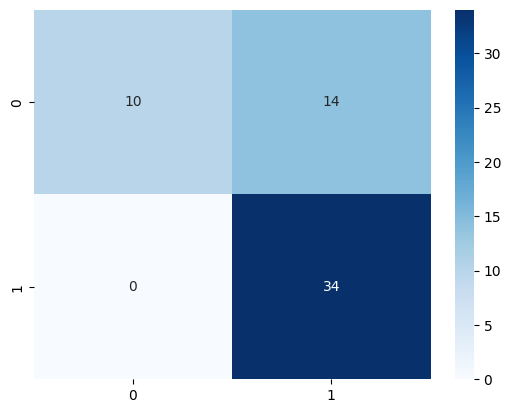

In [315]:
log_train, log_test = relatorio_ml(data4, LogisticRegression, opt = 0)

Acurácia treino: 100.00%
Acurácia teste: 72.41%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

--- CONFUSION  MATRIX ---


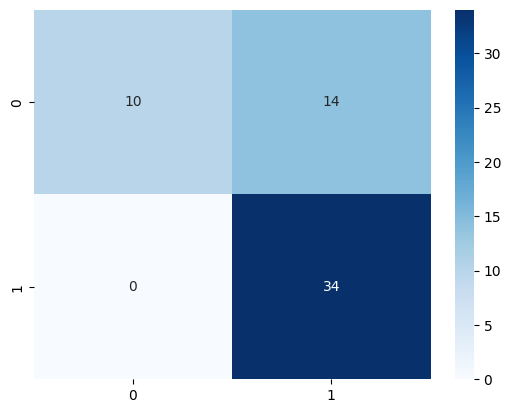

In [316]:
tree_triand, tree_test = relatorio_ml(data4, DecisionTreeClassifier)

Acurácia treino: 93.51%
Acurácia teste: 82.76%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

--- CONFUSION  MATRIX ---


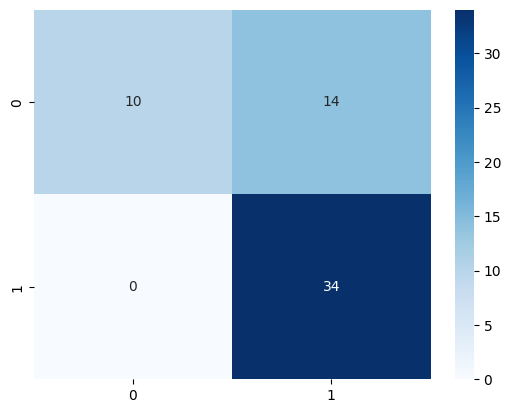

In [317]:
ada_train, ada_test = relatorio_ml(data4, AdaBoostClassifier)

Acurácia treino: 100.00%
Acurácia teste: 81.03%
--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       1.00      0.42      0.59        24
           1       0.71      1.00      0.83        34

    accuracy                           0.76        58
   macro avg       0.85      0.71      0.71        58
weighted avg       0.83      0.76      0.73        58

--- CONFUSION  MATRIX ---


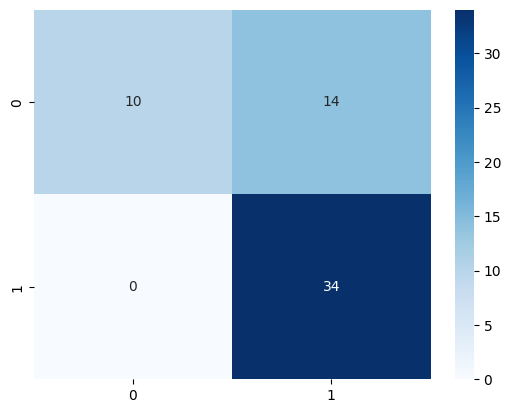

In [318]:
rand_train, rand_test = relatorio_ml(data4, RandomForestClassifier)

In [319]:
data_sclaer = { 'Models': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'Ada Boost Classifier'],
'Acuracia Treino' : [round(log_train * 100,2), round(tree_triand * 100,2), round(rand_train * 100,2), round(ada_train * 100,2)],
'Acuracia Teste' : [round(log_test * 100,2), round(tree_test * 100,2), round(rand_test * 100,2), round(ada_test * 100,2)],
}

df = pd.DataFrame(data_sclaer)
df.sort_values(by='Acuracia Teste', ascending=False, inplace=True)

In [320]:
df

,Models,Acuracia Treino,Acuracia Teste
0,Logistic Regression,87.45,84.48
3,Ada Boost Classifier,93.51,82.76
2,Random Forest Classifier,100.00,81.03
1,Decision Tree Classifier,100.00,72.41
